In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
output_dir = os.path.join(os.path.curdir, 'output') 

In [4]:
from bayesfilt import CTRV, CTRA, ExtendedKalmanFilter

## CTRA

In [5]:
ctra = CTRA()
dt = 0.1
ctra.update(dt=dt, sigmas=[0.0, 0.0])
start_x = [0., 0., 0., 0., 0., 0.]
np.random.seed(10)

In [127]:
tlen = 40
ncycles = 6
ttrue = np.linspace(0,tlen,int(tlen/dt)+1)
ytrue = []
cur_x = start_x
for t in ttrue:
    #cur_x[2] += np.random.randn(1)*0.0001
    cur_x[4] = 0.25*np.sin(2.0*np.pi*ncycles*t/tlen) + np.random.randn(1)*0.01
    cur_x[5] = 0.25*np.sin(2.0*np.pi*ncycles*t/tlen) + np.random.randn(1)*0.01
    cur_x = ctra.f(cur_x)
    ytrue.append(cur_x)
ytrue = np.asarray(ytrue).T
# vx = ytrue[3,:]*np.sin(ytrue[2,:])
# vy = ytrue[3,:]*np.cos(ytrue[2,:])
# ax = ytrue[5,:]*np.sin(ytrue[2,:])
# ay = ytrue[5,:]*np.cos(ytrue[2,:])
# ax = np.diff(vx, prepend=0)/dt
# ay = np.diff(vy, prepend=0)/dt
# ytrue = np.vstack([ytrue, vx, vy, ax, ay])
inds = np.sort(np.random.choice(ytrue.shape[1], size=300, replace=False))
if inds[0] !=0:
    inds = np.append([0], inds)
if inds[-1] != ytrue.shape[1] -1:
    inds = np.append(inds, [ytrue.shape[1]-1])
yobs = ytrue[:,inds].copy()
#yobs = yobs[[0, 1, 2, 3],:]
tobs = ttrue[inds].copy()
yobs[0,:] += np.random.randn(inds.size)*0.05
yobs[1,:] += np.random.randn(inds.size)*0.05
yobs[2,:] += np.random.randn(inds.size)*0.05
yobs[3,:] += np.random.randn(inds.size)*0.05

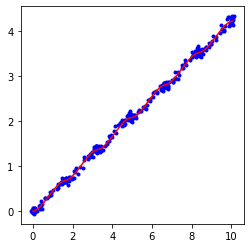

In [128]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(yobs[0,:], yobs[1,:], '.b')
ax.plot(ytrue[0,:], ytrue[1,:], '-r')

In [129]:
np.diff(tobs)

array([0.1, 0.2, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1,
       0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.2, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.2, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2, 0.1,
       0.1, 0.1, 0.3, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.3, 0.2, 0.1,
       0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1,
       0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.2, 0.2, 0.1, 0.1,
       0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2, 0.1, 0.1, 0.3, 0.2, 0.2, 0.1,
       0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.1, 0.2, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.2,
       0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3, 0.1, 0.1, 0.2, 0.1, 0.

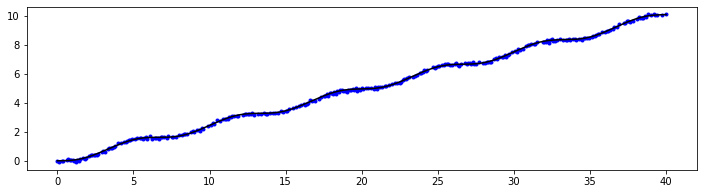

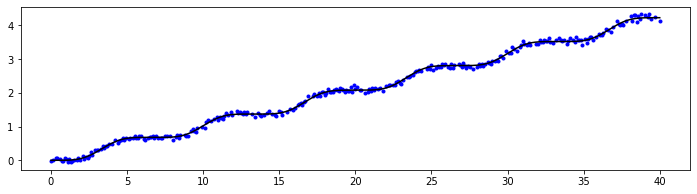

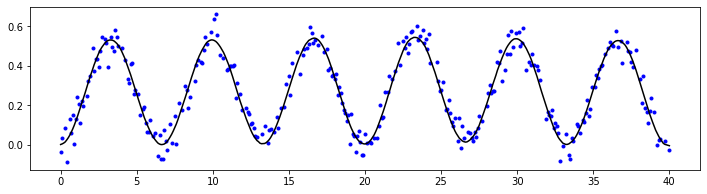

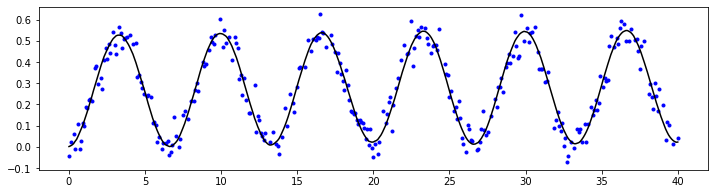

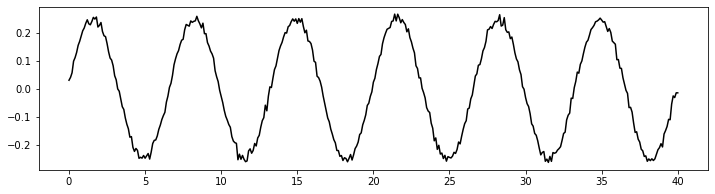

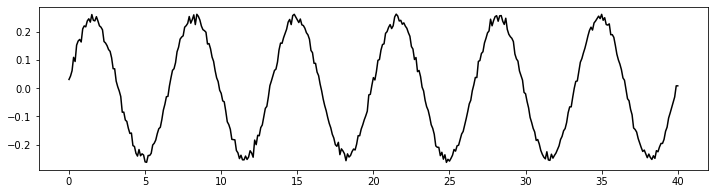

In [130]:
for i in range(6):
    fig, ax = plt.subplots(figsize=(12,3))
    if i in [0,1,2,3]:
        ax.plot(tobs,yobs[i,:], '.b')
    ax.plot(ttrue,ytrue[i,:], '-k')

In [131]:
np.save(os.path.join(output_dir, 'ttrue.npy'), ttrue)
np.save(os.path.join(output_dir, 'ytrue.npy'), ytrue)
np.save(os.path.join(output_dir, 'tobs.npy'), tobs)
np.save(os.path.join(output_dir, 'yobs.npy'), yobs)

## Extra

In [11]:
angle = 185*np.pi/180
print(angle, np.sin(angle), np.cos(angle))
new_angle = angle % (2.*np.pi)
if new_angle > np.pi:
    new_angle -= 2.*np.pi
print(new_angle, np.sin(new_angle), np.cos(new_angle))

3.2288591161895095 -0.08715574274765794 -0.9961946980917455
-3.0543261909900767 -0.0871557427476582 -0.9961946980917455
